# Basic usage

Let us start with a simple example to illustrate the use of `ruptures`.

First, we make the necessary imports and generate a piecewise constant signal with noise.

In [1]:
import matplotlib.pyplot as plt  # for display purposes
import ruptures as rpt  # our package

# generate signal
n_samples, dim, sigma = 1000, 3, 2
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

The true change points of this synthetic signal are available in the `bkps` variable.

In [2]:
print(bkps)

[191, 399, 598, 804, 1000]


Note that the first four element are change point indexes while the last is simply the number of samples.
(This is a technical convention so that functions in `ruptures` always know the length of the signal at hand.)

It is also possible to plot our $\mathbb{R}^3$-valued signal along with the true change points with the `rpt.display` function.
In the following image, the color changes whenever the mean of the signal shifts.

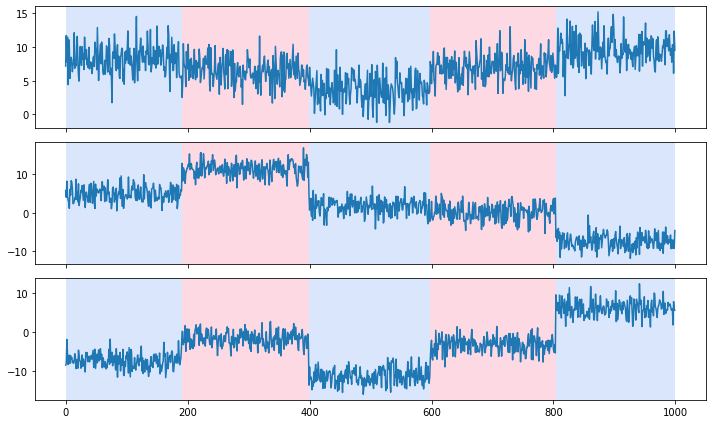

In [3]:
fig, ax_array = rpt.display(signal, bkps)

We can now perform change point detection, meaning that we find the indexes where the signal mean changes.
To that end, we use a well-known method called Pelt with a $L_2$ cost function.
(More information on these terms in the section [What is change point detection?](/what-is-cpd) and the [User guide](/user-guide).)

In [4]:
# detection
algo = rpt.Pelt(model="l2").fit(signal)
result = algo.predict(pen=200)  # 'pen' is for 'penalty'

print(result)

[190, 400, 600, 805, 1000]


Again the first elements are change point indexes and the last is the number of samples.

To visualy compare the true segmentation (`bkps`) and the estimated one (`result`), we can resort to `rpt.display` a second time.
In the following image, the alternating colors indicate the true breakpoints and the dashed vertical lines, the estimated breakpoints.

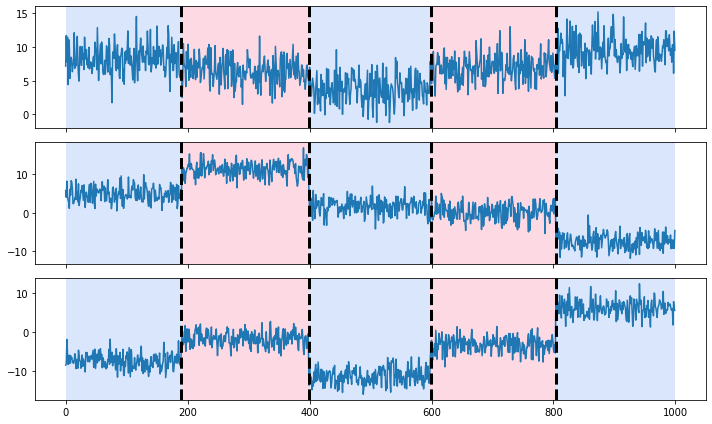

In [5]:
# display
rpt.display(signal, bkps, result)
plt.show()

In this simple example, both are quite similar and almost undistinguishable.